# Weekly assignment 5.1: Simple NumPy Exercises

In this task you are practicing using NumPy in several applications.

## Task 1. Power of a matrix

Write a function that would take in a matrix and a non-negative integer,
check for that matrix is square, and return the power of the matrix computed through
successive multiplication.

In [ ]:
import numpy as np

def matrix_power(mtrx,n=1):
    # Write your code here
    pass

A = np.array([[1,2,0],[0,2,3],[1,1,5]])
print(matrix_power(A))

In [9]:
import numpy as np

def matrix_power(mtrx,n=1):
    '''Power of a matrix computed through iterative multiplication'''
    if type(mtrx) is list:
        mtrx=np.array(mtrx)
    elif type(mtrx) is np.ndarray:
        pass
    else:
        raise(TypeError('Wrong type for matrix'))
    if type(n) is not int:
        raise(TypeError('Power should be int'))
    if n<0:
        raise(ValueError('Power should be non-negative'))

    ans=np.copy(mtrx) # you can verify by looking at id(ans)
                      # that Python does copy mtrx on first multiplication,
                      # but using np.copy is just more readable
    for i in range(n-1):
        ans = ans @ mtrx
    return ans

A = np.array([[1,2,0],[0,2,3],[1,1,5]])
print(matrix_power(A))

[[1 2 0]
 [0 2 3]
 [1 1 5]]


Here are the tests to pass for your code (which are referred to as *unit tests*)

In [ ]:
# Test the code above

A = np.array([[1,2,0],[0,2,3],[1,1,5]])
B = [[355,614,1806],[903,1565,4533],[1210,2113,6098]]
eq=np.equal(matrix_power(A,5),B)
if eq.all():
    print('Test 1 passed')
else:
    print('Test 1 FAIL')


A = [[1,2,0],[0,2,3],[1,1,5]]
B = [[355,614,1806],[903,1565,4533],[1210,2113,6098]]
eq=np.equal(matrix_power(A,5),B)
if eq.all():
    print('Test 2 passed')
else:
    print('Test 2 FAIL')


try:
    matrix_power([1],4.5)
except TypeError:
    print('Test 3 passed')
except:
    print('Test 3 FAIL')
else:
    print('Test 3 FAIL')

try:
    matrix_power([1],-5)
except ValueError:
    print('Test 4 passed')
except:
    print('Test 4 FAIL')
else:
    print('Test 4 FAIL')

In [10]:
# Python has a standard way to write test that can be automated and run in bulk. Here is an example that implements all the same tests as above

import unittest

class TestDemo(unittest.TestCase):
    """Example of how to use unittest in Jupyter."""

    def test1(self):
        '''general'''
        A = np.array([[1,2,0],[0,2,3],[1,1,5]])
        B = [[355,614,1806],[903,1565,4533],[1210,2113,6098]]
        eq=np.equal(matrix_power(A,5),B)
        self.assertTrue(eq.all)

    def test2(self):
        '''matrix as list'''
        A = [[1,2,0],[0,2,3],[1,1,5]]
        B = [[355,614,1806],[903,1565,4533],[1210,2113,6098]]
        eq=np.equal(matrix_power(A,5),B)
        self.assertTrue(eq.all)

    def test3(self):
        '''power'''
        self.assertRaises(TypeError,matrix_power,[1],4.5)
        self.assertRaises(ValueError,matrix_power,[1],-3)

# this is the way to run tests
if __name__ == '__main__':
    # tweaking for Jupyter Notebook
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    # from command line
    # unittest.main()

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


## Task 2. Linear regression model

Recall that the linear regression model with data in columns of
$ (X,y) $ where $ X $ are independent variables and $ y $ is
the dependent variable, parameter vector $ \beta $ and errors
$ \varepsilon \sim N(0, \sigma) $

$$
y = X \beta + \varepsilon \quad \quad \varepsilon \sim N(0, 1)
$$

is estimated by ordinary least sqeares (OLS) method $ \beta $ as

$$
\hat{\beta} = (X'X)^{-1} X' y.
$$

Given

$$
y =
\begin{bmatrix}
3 \\
7 \\
10 \\
5 \\
4 \\
7 \\
\end{bmatrix},
\quad
X =
\begin{bmatrix}
5 & 3 \\
2 & 3 \\
3 & 1 \\
2 & 8 \\
2 & 8 \\
4.5 & 2.5 \\
2.5 & 1.5 \\
\end{bmatrix}
$$

Compute $ \hat{\beta} $.

In [11]:
import numpy as np

def ols(X,y):
    '''Return the OLS estimate given data X,y'''
    # Write your code here
    return [0,0]


y = np.array([3, 7, 10, 5, 4, 7])
X = np.array([[5, 3],
              [2, 3],
              [3, 1],
              [2, 8],
              [4.5, 2.5],
              [2.5, 1.5]])
beta=ols(X,y)
print(beta)

#Test
eq=np.abs(beta - np.array([1.24408295,0.35055123]))<1e-8
if eq.all():
    print('Test passed')
else:
    print('Test FAIL')

[0, 0]
Test FAIL


In [12]:
import numpy as np

def ols(X,y):
    '''Return the OLS estimate given data X,y'''
    return np.linalg.inv(X.T@X)@X.T@y

y = np.array([3, 7, 10, 5, 4, 7])
X = np.array([[5, 3],
              [2, 3],
              [3, 1],
              [2, 8],
              [4.5, 2.5],
              [2.5, 1.5]])
beta=ols(X,y)
print(beta)

#Test
eq=np.abs(beta - np.array([1.24408295,0.35055123]))<1e-8
if eq.all():
    print('Test passed')
else:
    print('Test FAIL')

[1.24408295 0.35055123]
Test passed


## Task 3. Autoregressive model in matrix form

Consider the AR(1) model

$$
y_t = a y_{t-1} + \varepsilon, \; \varepsilon \sim N(0, 1).
$$

We can represent it in the form

$$
Ay = \varepsilon \quad \quad \varepsilon \sim N(0, 1)
$$

where $ A $ is

$$
A = \begin{bmatrix} 1  & 0 & \cdots & 0 & 0  \cr
                      -a  & 1 & \cdots & 0 & 0 \cr
                      \vdots & \vdots & \cdots & \vdots & \vdots \cr
                      \vdots & \vdots & \cdots & 1 & 0 \cr
                      0 & 0 & \cdots & -a & 1 \end{bmatrix}
$$

and $ y $ and $ \varepsilon $ are $ (T x 1) $ vectors

Generate an AR(1) series with $ T=500 $ and $ \alpha = 0.9 $
using matrix algebra, and make a plot of $ y_t $.

Hint: use NumPy.eye() with additional arguments.

In [ ]:
# replace @@@ by your code
import numpy as np

T = @@@
α = @@@
ɛ = np.random.randn(T)
A = @@@
y = @@@

import matplotlib.pyplot as plt
@@@

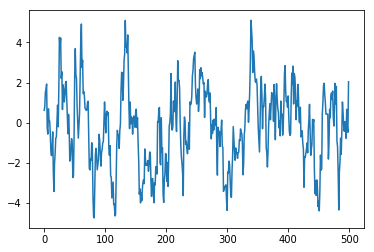

In [13]:
import numpy as np

T = 500
α = 0.9
ɛ = np.random.randn(T)
A = np.eye(T) + -α * np.eye(T, k=-1)
y = np.linalg.inv(A) @ ɛ #alternative 1
y = np.linalg.solve(A,ɛ) #alternative 2

import matplotlib.pyplot as plt

plt.plot(y)
plt.show()